<a href="https://colab.research.google.com/github/sanjoy-kumar/Machine-Learning/blob/main/Logistic_Regression_batch_gradient_decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Gadiant Decent for Logistic Regression**
-------------------------------------------
**Introduction:**

Gradient Descent is the process of minimizing a function by following the gradients of the cost function. This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient and can move in that direction, e.g. downhill towards the minimum value.



**Implementation Steps:**
--------------------------


In [991]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random


In [992]:
#loading heart.csv file
HeartDF = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv',index_col=0)
X = (HeartDF[['famhist','sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']])
print(X)

           famhist  sbp  tobacco    ldl  ...  typea  obesity  alcohol  age
row.names                                ...                              
1          Present  160    12.00   5.73  ...     49    25.30    97.20   52
2           Absent  144     0.01   4.41  ...     55    28.87     2.06   63
3          Present  118     0.08   3.48  ...     52    29.14     3.81   46
4          Present  170     7.50   6.41  ...     51    31.99    24.26   58
5          Present  134    13.60   3.50  ...     60    25.99    57.34   49
...            ...  ...      ...    ...  ...    ...      ...      ...  ...
459         Absent  214     0.40   5.98  ...     64    28.45     0.00   58
460         Absent  182     4.20   4.41  ...     52    28.61    18.72   52
461         Absent  108     3.00   1.59  ...     40    20.09    26.64   55
462         Absent  118     5.40  11.61  ...     64    27.35    23.97   40
463        Present  132     0.00   4.82  ...     62    14.70     0.00   46

[462 rows x 9 columns]


**EDA**


Q1. How much is the percentage each class 0 or 1?

In [993]:
Y = np.array(HeartDF[['chd']])
n = len(Y)
chd_zero = 0
chd_one = 0
garbage =0
for i in range(n):
  if Y[i] == 0:
    chd_zero += 1
  elif Y[i] == 1:
    chd_one += 1
  else:
    garbage += 1

percentage_of_zero = 0
percentage_of_one = 0

percentage_of_zero = (chd_zero/n)*100
percentage_of_one = (chd_one/n)*100
print("Percentage of zero(0) in each class is {:.2f}%.".format(percentage_of_zero))
print("Percentage of one(1) in each class is {:.2f}%.".format(percentage_of_one))



Percentage of zero(0) in each class is 65.37%.
Percentage of one(1) in each class is 34.63%.


Q2. How many missing values do we have?

In [994]:
# ----------------Count total NaN at each column in the DataFrame -------------

print("\nCount total NaN(Not a Number) at each column in the DataFrame :\n\n",
      HeartDF.isnull().sum())

#---------------- Count total NaN in a DataFrame-------------------------------

print(" \nCount total NaN(Not a Number) in the DataFrame : \n\n",
       HeartDF.isnull().sum().sum())


Count total NaN(Not a Number) at each column in the DataFrame :

 sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
 
Count total NaN(Not a Number) in the DataFrame : 

 0


Q3. How many categorical variables you have in your features?

Answer: one categorical variable we have in our features. It is '**famhist**'.

Encode(**One-Hot Encoding**) the categorical variable:



In [995]:
HeartDF['famhist']= pd.get_dummies(HeartDF['famhist'])
HeartDF.head(10)

# ----------------Count total NaN at each column in the DataFrame -------------

print("\nCount total NaN(Not a Number) at 'famhist' column after Encoding :\n\n",
      HeartDF['famhist'].isnull().sum())



Count total NaN(Not a Number) at 'famhist' column after Encoding :

 0


Q4. What features have the maximum corelation?

In [996]:

print(HeartDF.corr(method ='pearson').abs())
#print(HeartDF.corr().abs().unstack().sort_values(ascending=False))

def get_redundant_pairs(HeartDF):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = HeartDF.columns   
    for i in range(0, HeartDF.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(HeartDF, n=5):
    au_corr = HeartDF.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(HeartDF)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("\n---\t --------\t-----------")
print("Top\t Absolute \tCorrelations")
print("---\t --------\t-----------")
print(get_top_abs_correlations(HeartDF, 3))



                sbp   tobacco       ldl  ...   alcohol       age       chd
sbp        1.000000  0.212247  0.158296  ...  0.140096  0.388771  0.192354
tobacco    0.212247  1.000000  0.158905  ...  0.200813  0.450330  0.299718
ldl        0.158296  0.158905  1.000000  ...  0.033403  0.311799  0.263053
adiposity  0.356500  0.286640  0.440432  ...  0.100330  0.625954  0.254121
famhist    0.085645  0.088601  0.161353  ...  0.080520  0.239667  0.272373
typea      0.057454  0.014608  0.044048  ...  0.039498  0.102606  0.103156
obesity    0.238067  0.124529  0.330506  ...  0.051620  0.291777  0.100095
alcohol    0.140096  0.200813  0.033403  ...  1.000000  0.101125  0.062531
age        0.388771  0.450330  0.311799  ...  0.101125  1.000000  0.372973
chd        0.192354  0.299718  0.263053  ...  0.062531  0.372973  1.000000

[10 rows x 10 columns]

---	 --------	-----------
Top	 Absolute 	Correlations
---	 --------	-----------
adiposity  obesity    0.716556
           age        0.625954
tobacco 

**Standardization:**




In [997]:
cols_to_Normal = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']
X_new= X[cols_to_Normal]


# apply the z-score method in Pandas using the .mean() and .std() methods

def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()        
    return df_std
    
# call the z_score function
X_Features_standardized = z_score(X_new)

X_Features_standardized['famhist'] = HeartDF['famhist']
print(X_Features_standardized)


                sbp   tobacco       ldl  ...   alcohol       age  famhist
row.names                                ...                             
1          1.057417  1.821099  0.477894  ...  3.274189  0.628654        0
2          0.276789 -0.789382 -0.159507  ... -0.612081  1.381617        1
3         -0.991731 -0.774141 -0.608585  ... -0.540597  0.217947        0
4          1.545310  0.841352  0.806252  ...  0.294742  1.039361        0
5         -0.211103  2.169453 -0.598928  ...  1.645991  0.423301        0
...             ...       ...       ...  ...       ...       ...      ...
459        3.692037 -0.704470  0.598614  ... -0.696228  1.039361        1
460        2.130781  0.122871 -0.159507  ...  0.068445  0.628654        1
461       -1.479624 -0.138395 -1.521228  ...  0.391960  0.834008        1
462       -0.991731  0.384137  3.317227  ...  0.282897 -0.192760        1
463       -0.308682 -0.791559  0.038474  ... -0.696228  0.217947        0

[462 rows x 9 columns]


**Initialization**

In [998]:
def initialize_betas(dim):
    random.seed(10) 
    b = random.random()
    w = np.random.rand(dim)
    return b,w

#b,theta = initialize_betas(X_Features_standardized.shape[1])
#print(b,theta)

**Hypothesis(Model)**

In [999]:
def sigmoid(b, w ,X_new):
    np_values = X_new.values    
    Z = b + np.matmul(np_values,w)
    return (1.0 / (1 + np.exp(-Z)))

#y_predict = sigmoid(b,theta,X_Features_standardized)
#print(y_predict[0:10])


**Cost Function**

In [1000]:
def get_cost( y, y_hat):
    return - np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))

# Reshape Y
Y=Y.reshape(len(Y), )
#current_cost= get_cost(Y,y_predict)
#print(current_cost)
Y.shape

(462,)

**Updating theta values**


In [1001]:
def update_beta(b_0,w_0,y,y_hat,X_new,alpha):
    db = np.sum( y_hat - y)/ len(y)
    b_0 = b_0 - alpha * db
    dw = np.dot((y_hat - y), X_new)/ len(y)
    w_0 = w_0 - alpha * dw     
    return b_0,w_0

#alpha = 0.1
#b, w = update_beta(b,theta,Y,y_predict,X_Features_standardized,alpha)
#b, w

**Batch Gradient Decent Iteration**


In [1002]:
# ---------- Write a code for gradient descent iterations ---------------

def gradient_descent_iterations(Y,X_Features_standardized,alph,num_iterations):
    all_costs = []
    b,w = initialize_betas(X_Features_standardized.shape[1])
    print("initial guess of b and w: " , b ,w)
    
    for each_iter in range (num_iterations):
        y_hat = sigmoid(b, w , X_Features_standardized)
        current_cost = get_cost (Y, y_hat)
        prev_b = b
        prev_w = w
        b, w = update_beta (prev_b,prev_w,Y,y_hat,X_Features_standardized,alpha)
        all_costs.append(current_cost)
        
        if each_iter % 50 == 0:
          print('Iteration:',each_iter, 'Cost:',current_cost)
          each_iter += 1
    print("Final estimates of b and w are: ", b,w)
    return all_costs


**Learning Curve**

**Case - 1**

alph = 0.001 &
iterations = 500

initial guess of b and w:  0.5714025946899135 [0.42030098 0.21190882 0.14155791 0.09045025 0.22296954 0.41541712
 0.05465424 0.00609564 0.77520535]
Iteration: 0 Cost: 138.10322702786902
Iteration: 50 Cost: 51.36630021793702
Iteration: 100 Cost: 39.82795202403732
Iteration: 150 Cost: 37.36451079889869
Iteration: 200 Cost: 36.67751989568757
Iteration: 250 Cost: 36.467902184319016
Iteration: 300 Cost: 36.413244734087854
Iteration: 350 Cost: 36.41531859946197
Iteration: 400 Cost: 36.43942986486244
Iteration: 450 Cost: 36.471753544558226
Final estimates of b and w are:  -0.42453520959941665 [ 0.13065017  0.3595419   0.3685706   0.11070979  0.38650024 -0.23524268
  0.01005874  0.68553517 -0.78951039]


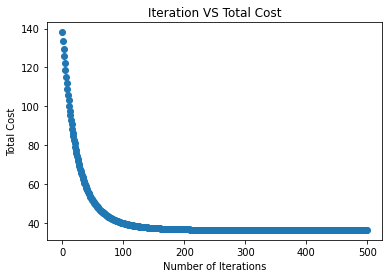

In [1003]:
alph = 0.001
num_iterations = 500

all_costs = gradient_descent_iterations(Y,X_Features_standardized,alph,num_iterations)

plt.scatter(range(num_iterations),all_costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Total Cost")
plt.title("Iteration VS Total Cost")
plt.show()

**Case -2**

alph = 0.0001 & iterations = 500

initial guess of b and w:  0.5714025946899135 [0.89049833 0.29565198 0.40000306 0.92600675 0.39939074 0.49042857
 0.06744798 0.5070331  0.71204478]
Iteration: 0 Cost: 149.11917790182136
Iteration: 50 Cost: 55.04778354221957
Iteration: 100 Cost: 39.99050931096057
Iteration: 150 Cost: 37.214457365889665
Iteration: 200 Cost: 36.52295273884656
Iteration: 250 Cost: 36.33995540559641
Iteration: 300 Cost: 36.310628938686754
Iteration: 350 Cost: 36.333243470770455
Iteration: 400 Cost: 36.373546406548705
Iteration: 450 Cost: 36.418614643736404
Final estimates of b and w are:  -0.4265464841826818 [ 0.13112907  0.36048819  0.3620597   0.18823883  0.39137362 -0.2924277
  0.00748165  0.65163415 -0.78735488]


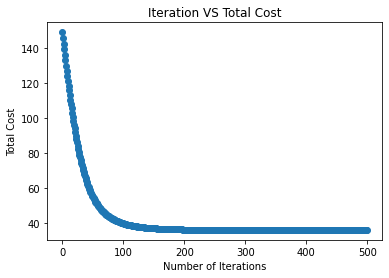

In [1004]:
alph = 0.0001
num_iterations = 500

all_costs = gradient_descent_iterations(Y,X_Features_standardized,alph,num_iterations)

plt.scatter(range(num_iterations),all_costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Total Cost")
plt.title("Iteration VS Total Cost")
plt.show()

**Case - 3**

alpha = 0.001 & iterations = 1000

initial guess of b and w:  0.5714025946899135 [0.28025391 0.46124639 0.0607621  0.60388775 0.70561664 0.02350153
 0.47776085 0.08587514 0.98012102]
Iteration: 0 Cost: 147.82904231595236
Iteration: 50 Cost: 54.794480359773736
Iteration: 100 Cost: 40.21065774241908
Iteration: 150 Cost: 37.203573312138175
Iteration: 200 Cost: 36.422513849385766
Iteration: 250 Cost: 36.21769602200273
Iteration: 300 Cost: 36.18986358633329
Iteration: 350 Cost: 36.221314126452945
Iteration: 400 Cost: 36.27246655788651
Iteration: 450 Cost: 36.32857498058112
Iteration: 500 Cost: 36.383676382778326
Iteration: 550 Cost: 36.4352538161311
Iteration: 600 Cost: 36.48229418545855
Iteration: 650 Cost: 36.52450602817545
Iteration: 700 Cost: 36.56196653109531
Iteration: 750 Cost: 36.59494365564242
Iteration: 800 Cost: 36.62379840812835
Iteration: 850 Cost: 36.64892829823684
Iteration: 900 Cost: 36.6707340784769
Iteration: 950 Cost: 36.68960050494979
Final estimates of b and w are:  -0.3602151587358709 [ 0.13212379  0.36

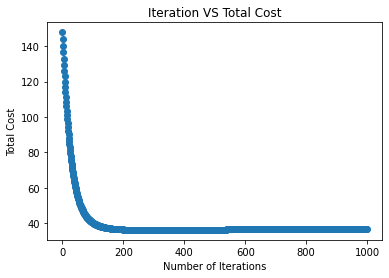

In [1005]:
alph = 0.001
num_iterations = 1000

all_costs = gradient_descent_iterations(Y,X_Features_standardized,alph,num_iterations)

plt.scatter(range(num_iterations),all_costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Total Cost")
plt.title("Iteration VS Total Cost")
plt.show()

**Case - 4**

alpha = 0.0001 & iterations = 1000

initial guess of b and w:  0.5714025946899135 [0.43381641 0.49898295 0.49067177 0.9325386  0.64066457 0.72837195
 0.5921876  0.52170406 0.81964335]
Iteration: 0 Cost: 160.80288851366114
Iteration: 50 Cost: 57.42832786393673
Iteration: 100 Cost: 40.19376837658157
Iteration: 150 Cost: 37.18815211970667
Iteration: 200 Cost: 36.46010479278791
Iteration: 250 Cost: 36.27071932147107
Iteration: 300 Cost: 36.24290069026397
Iteration: 350 Cost: 36.269828412421056
Iteration: 400 Cost: 36.31550485866122
Iteration: 450 Cost: 36.36624360789878
Iteration: 500 Cost: 36.41637584495575
Iteration: 550 Cost: 36.463457303098956
Iteration: 600 Cost: 36.506481903113205
Iteration: 650 Cost: 36.545142211889605
Iteration: 700 Cost: 36.57948857059867
Iteration: 750 Cost: 36.60975580688801
Iteration: 800 Cost: 36.63626832520558
Iteration: 850 Cost: 36.65938577272463
Iteration: 900 Cost: 36.679471502034886
Iteration: 950 Cost: 36.696874573143795
Final estimates of b and w are:  -0.3603430838365398 [ 0.13187294  0

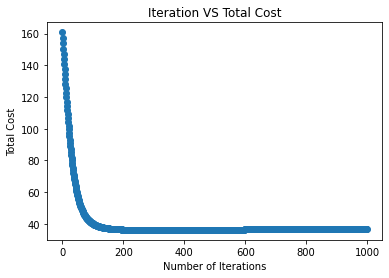

In [1006]:
alph = 0.0001
num_iterations = 1000

all_costs = gradient_descent_iterations(Y,X_Features_standardized,alph,num_iterations)

plt.scatter(range(num_iterations),all_costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Total Cost")
plt.title("Iteration VS Total Cost")
plt.show()

**Case - 5**

alpha = 0.001 & iterations = 10000

initial guess of b and w:  0.5714025946899135 [0.83445038 0.59291199 0.51583456 0.41159034 0.51272368 0.05767892
 0.26776797 0.80073863 0.93290693]
Iteration: 0 Cost: 146.9849933842286
Iteration: 50 Cost: 57.18244433206847
Iteration: 100 Cost: 40.593592648107794
Iteration: 150 Cost: 37.20780206716512
Iteration: 200 Cost: 36.37307932694348
Iteration: 250 Cost: 36.17288618609092
Iteration: 300 Cost: 36.15702626810562
Iteration: 350 Cost: 36.19822766170755
Iteration: 400 Cost: 36.25595303054294
Iteration: 450 Cost: 36.31619079501147
Iteration: 500 Cost: 36.37381494469103
Iteration: 550 Cost: 36.42693299975447
Iteration: 600 Cost: 36.4749411005367
Iteration: 650 Cost: 36.517799564312654
Iteration: 700 Cost: 36.555734174660756
Iteration: 750 Cost: 36.58909738737957
Iteration: 800 Cost: 36.61829617246086
Iteration: 850 Cost: 36.643751454525756
Iteration: 900 Cost: 36.66587458105532
Iteration: 950 Cost: 36.68505389568267
Iteration: 1000 Cost: 36.70164764426318
Iteration: 1050 Cost: 36.7159809

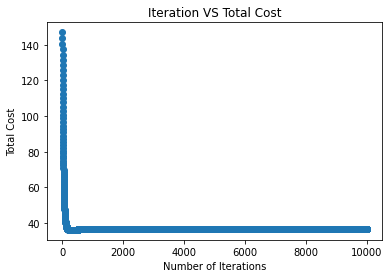

In [1007]:
alph = 0.001
num_iterations = 10000

all_costs = gradient_descent_iterations(Y,X_Features_standardized,alph,num_iterations)

plt.scatter(range(num_iterations),all_costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Total Cost")
plt.title("Iteration VS Total Cost")
plt.show()

**Case - 6**

alpha = 0.0001 & iterations = 10000

initial guess of b and w:  0.5714025946899135 [0.01200299 0.0169275  0.93066731 0.84546991 0.49342587 0.94163456
 0.25033574 0.31632396 0.94216713]
Iteration: 0 Cost: 164.56074580368858
Iteration: 50 Cost: 58.298621335050576
Iteration: 100 Cost: 40.53034872338173
Iteration: 150 Cost: 37.341221610816575
Iteration: 200 Cost: 36.51977220818555
Iteration: 250 Cost: 36.28113020612602
Iteration: 300 Cost: 36.228396168920966
Iteration: 350 Cost: 36.24372617846886
Iteration: 400 Cost: 36.28495836010924
Iteration: 450 Cost: 36.335010485497186
Iteration: 500 Cost: 36.386362712583356
Iteration: 550 Cost: 36.43556691772025
Iteration: 600 Cost: 36.48107445605412
Iteration: 650 Cost: 36.522286912181244
Iteration: 700 Cost: 36.55910182704743
Iteration: 750 Cost: 36.59167780551016
Iteration: 800 Cost: 36.6203057714835
Iteration: 850 Cost: 36.64533577571752
Iteration: 900 Cost: 36.66713477681471
Iteration: 950 Cost: 36.6860624987937
Iteration: 1000 Cost: 36.702458148024576
Iteration: 1050 Cost: 36.7166

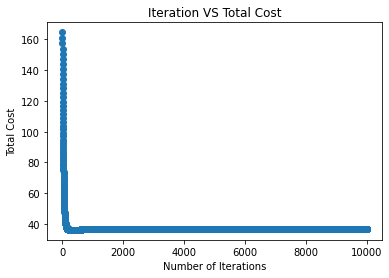

In [1008]:
alph = 0.0001
num_iterations = 10000

all_costs = gradient_descent_iterations(Y,X_Features_standardized,alph,num_iterations)

plt.scatter(range(num_iterations),all_costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Total Cost")
plt.title("Iteration VS Total Cost")
plt.show()